f'https://search.naver.com/search.naver?query={지역명}%EB%82%A0%EC%94%A8'

함수작성
입력값 : 지역
반환값 : 온도, 상태, 체감온도, 습도

In [32]:
import requests
지역명 = '종로'
url = f'https://search.naver.com/search.naver?query={지역명}%EB%82%A0%EC%94%A8'
html = requests.get(url)

# 호출결과 확인
html

<Response [200]>

<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="strict-origin-when-cross-origin">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="종로날씨 : 네이버 검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'종로날씨'의 네이버 검색 결과입니다."> <meta name="description" lang="ko" content="'종로날씨'의 네이버 검색 결과입니다."> <title>종로날씨 : 네이버 검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_251218.css"> <link rel="stylesheet" 
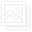
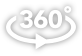
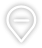

In [33]:
# html 확인
print(html.text)

<!DOCTYPE html>
 <html lang="ko"><head> <meta charset="utf-8"/> <meta content="strict-origin-when-cross-origin" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="종로날씨 : 네이버 검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'종로날씨'의 네이버 검색 결과입니다." property="og:description"/> <meta content="'종로날씨'의 네이버 검색 결과입니다." lang="ko" name="description"/> <title>종로날씨 : 네이버 검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_251218.css" rel="stylesheet" type="text/css"/> <link href="https:/
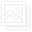
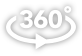
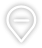

In [34]:
# 파싱
from bs4 import BeautifulSoup

soup = BeautifulSoup(html.text, 'html.parser')
soup

In [36]:
# 원하는 데이터 찾기
# 온도
print("<현재 종로구 온도, 상태, 체감온도, 습도 출력>")
온도html = soup.find('div', 'temperature_text')
온도 = 온도html.text.strip().replace('현재 온도', '')[:-1]
print("온도:",온도)

# 상태
상태 = soup.find('span', 'weather before_slash').text
print("상태:", 상태)

# 체감온도
체감온도html = soup.find_all('div', 'sort')
체감온도 = 체감온도html[0].text.strip().replace('체감', '')[:-1]
print("체감온도:",체감온도)

# 습도
습도html = soup.find_all('div', 'sort')
습도 = 습도html[1].text.strip().replace('습도', '')[:-1]
print("습도:",습도)

<현재 종로구 온도, 상태, 체감온도, 습도 출력>
온도: -2.5
상태: 맑음
체감온도:  -6.4
습도:  28


In [37]:
종로날씨리스트 = soup.find_all('dd', 'desc')
for i in 종로날씨리스트:
    print(i)

# 체감, 습도, 서풍 순

<dd class="desc">-6.4°</dd>
<dd class="desc">28%</dd>
<dd class="desc">2.9m/s</dd>
<dd class="desc">40%</dd>
<dd class="desc">40%</dd>
<dd class="desc">60%</dd>
<dd class="desc">60%</dd>


In [38]:
종로 = soup.find('dl', class_='summary_list')

result = {}
for item in 종로.find_all('div', class_='sort'):
    key = item.find('dt', class_='term').get_text(strip=True)
    value_text = item.find('dd', class_='desc').get_text(strip=True)
    result[key] = value_text
result

{'체감': '-6.4°', '습도': '28%', '서풍': '2.9m/s'}

In [39]:
# 데이터프레임으로 변환
import pandas as pd
df = pd.DataFrame([result])
df

,체감,습도,서풍
0,-6.4°,28%,2.9m/s
